# Predictive Analysis in the Auto Insurance Industry

Currently, Insurance Industry is working on the historical data available to take informed decisions applying actuarial practices doing time to review and revise. However, this may result in delays identification of patterns/potential loss cases.

With the use of latest technologies, it is now feasible to take real-time decisions based on the  current data, social media profiling, etc. to ensure that business underwritten are genuine. In order to develop such a system, we shall do research on Private Cars.

We will consider the following Parameters to do Predictive Analysis while Policy Booking:
<ul>
    <li> Geography - Accident prone area, hilly area... etc.
    <li> Number of Claims and amount
    <li> Driving Pattern/ Schedule
    <li> Business source
    <li> Vehicle age
    <li> Driver age
    <li> Make/ Model of the Vehicle
    
We are going to explore the cleaning of data from the [Auto Insurance Dataset](https://www.kaggle.com/junglisher/vehicle-insurance-data/code)

# Describing the parameters
<ul>
    <li> <h4> Geography </h4>The Geography of the client contributes largely to the risk factor of the policy. The terrain can influence the difficulty of driving, and hence the risk of accident. A populated area with unmetallled roads is more dangerous than the converse. Geopolitical factors such as crime and terrorism also play a role. The quantitative measurement we can thus use is the zip code, which is beneficial because areas close to each other have similar zip codes. 
    <li> <h4> Number of Claims and Amount </h4>
        This data tells us about the severity of the accident. If the number and amount is high, it means that the accident is more severe, making the risk associated with a similar policy to be hihger. It can also give an idea about the spread of the severity of accident when analysed along with other parameters.
    <li> <h4>Driving Pattern/ Schedule </h4>
Accidents are more likely while driving at night time, and the probability is proportional to the total time spent driving. Hence data like number of hours driving in a week and time of day driving can provide insight.
    <li> <h4>Vehicle Age </h4>
Newer Vehicles are less prone to accidents than older vehicles. Although the significance of this parameter may not be that much, it is a datapoint that can be obtained relatively easily.
    <li> <h4>Driver Age</h4>
The relationship between age and risk factor is not that simple. The General consensus is that risk decreases with age as older drivers drive for less time, at lower speeds and for less distances. However, at very young ages, rash driving can cause an increase in accidents.
    <li> <h4>Insured Gender</h4>
Research shows that women are generally safer than men and are 3 times less likely to be in a fatal accident. However, there are many studies for and against this claim, and thus this parameter may not have a huge weightage in the model.
    <li> <h4>Months as a Customer</h4>
Established customers have a track record and hence are generally considered lower-risk as compared to new customers.
    <li> <h4>Make/Model</h4>
The make and model of a vehicle gives us information about two things: first is subtle engineering flaws that might affect a certain model or the cars of the whole company. For example, a car company may have generally worse cars for all models because of ignoring quality checks. The second factor is the kind of customers companies attract. Sports cars are as well engineered as Business cars, however, the kind of customer that buys a sports car may be more risk-taking than the former. This parameter thus has a significant impact on the model, but an important distinction is that the kind of data we get is categorical.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Import the dataset.
orig_data = data= pd.read_csv("D:\\Car Predictive Analysis\\VehicleInsuranceData.csv")
data = orig_data.copy()

<h3> Understanding the Data </h3>

We will now spend time in analysing the data, seeing the different features and defining the label

In [4]:
data.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
data.tail()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
8625,9129,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
8626,9131,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8627,9132,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8628,9133,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
8629,9134,2611.836866,No,Extended,College,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [ ]:
data.shape

(8630, 22)

In [ ]:
data.describe()

,Unnamed: 0,clv,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
count,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,4560.576825,6725.281515,37586.405794,91.677057,15.084473,48.004287,0.389108,3.020626,427.131607
std,2637.448711,3934.876313,30453.838594,32.648209,10.048979,27.880693,0.920491,2.445994,282.722326
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2280.250000,3858.177183,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.881398
50%,4547.500000,5569.220419,33817.000000,81.000000,14.000000,48.000000,0.000000,2.000000,376.880363
75%,6852.750000,8456.408530,62250.750000,108.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,9134.000000,21235.445570,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
data.columns

Index(['Unnamed: 0', 'clv', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

As seen, we have 21 unique features in the data set. We observe that most of the data is categorical and hence we have to deal with it in a way that will give us the numercical result that we desire. We see that the **clv**, or **Customer Lifetime Value**, is the closest thing that we have to the risk score that we want to asses, so for the purpose of training, we will use this column as the label.

But first, let us account for categorical data



<h1> Accounting for categorical values </h1>

First we will find out the number of unique values for each parameter. Only then we can understand the spread of the categorical data

In [ ]:
data.nunique()

Unnamed: 0                       8630
clv                              7602
Response                            2
Coverage                            3
Education                           5
EmploymentStatus                    5
Gender                              2
Income                           5379
Location.Code                       3
Marital.Status                      3
Monthly.Premium.Auto              188
Months.Since.Last.Claim            36
Months.Since.Policy.Inception     100
Number.of.Open.Complaints           6
Number.of.Policies                  9
Policy.Type                         3
Policy                              9
Renew.Offer.Type                    4
Sales.Channel                       4
Total.Claim.Amount               4820
Vehicle.Class                       6
Vehicle.Size                        3
dtype: int64

In [ ]:
data.dtypes

Unnamed: 0                         int64
clv                              float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto               int64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                      object
dtype: object

In [ ]:
data['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
data['Policy.Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [ ]:
data['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

Hence as seen above, most of the data is categorical, which we need to convert to a numerical values that we use to learn the model

In [ ]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['Education'] = number.fit_transform(data['Education'].astype('str'))
data['Coverage'] = number.fit_transform(data['Coverage'].astype('str'))
data['Response'] = number.fit_transform(data['Response'].astype('str'))
data['EmploymentStatus'] = number.fit_transform(data['EmploymentStatus'].astype('str'))
data['Gender'] = number.fit_transform(data['Gender'].astype('str'))
data['Location.Code'] = number.fit_transform(data['Location.Code'].astype('str'))
data['Marital.Status'] = number.fit_transform(data['Marital.Status'].astype('str'))
data['Policy.Type'] = number.fit_transform(data['Policy.Type'].astype('str'))
data['Policy'] = number.fit_transform(data['Policy'].astype('str'))
data['Renew.Offer.Type'] = number.fit_transform(data['Renew.Offer.Type'].astype('str'))
data['Sales.Channel'] = number.fit_transform(data['Sales.Channel'].astype('str'))
data['Vehicle.Class'] = number.fit_transform(data['Vehicle.Class'].astype('str'))
data['Vehicle.Size'] = number.fit_transform(data['Vehicle.Size'].astype('str'))

data.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,3,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,4,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,5,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [ ]:
data.dtypes

Unnamed: 0                         int64
clv                              float64
Response                           int64
Coverage                           int64
Education                          int64
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location.Code                      int64
Marital.Status                     int64
Monthly.Premium.Auto               int64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints          int64
Number.of.Policies                 int64
Policy.Type                        int64
Policy                             int64
Renew.Offer.Type                   int64
Sales.Channel                      int64
Total.Claim.Amount               float64
Vehicle.Class                      int64
Vehicle.Size                       int64
dtype: object

As seen above, we have encoded all the catergorical values as numerical label

<h3> Data Cleaning </h3>

Now, we will begin cleaning the data and managing the NULL/redundant values

In [ ]:
data.isnull().sum()

Unnamed: 0                       0
clv                              0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

Hence, there are no NULL values. We will now remove the other redundant features such as Coverage, etc.

In [ ]:
client = data.drop(['Coverage'], axis =1)

In [ ]:
client.head()

,Unnamed: 0,clv,Response,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,3,12887.431650,0,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,4,7645.861827,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,5,2813.692575,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


 <h3> Relationship Analysis </h3>
 
 We have to now find the relationship between the data with each other. We will make a <b> corellation matrix </b> which is a table showing the correlation coefficients between the variables. It is used to summarize data as an input in a more advanced analysis and also as a diaganostic for advanced analysis

In [ ]:
correlation = orig_data.corr() 

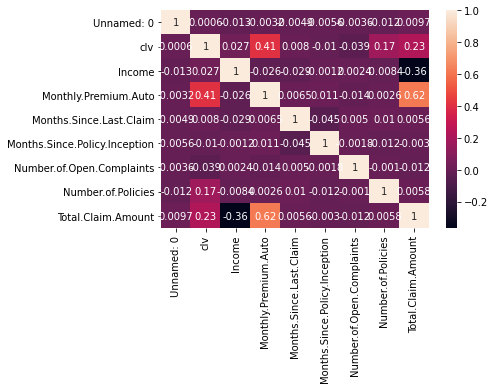

In [ ]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

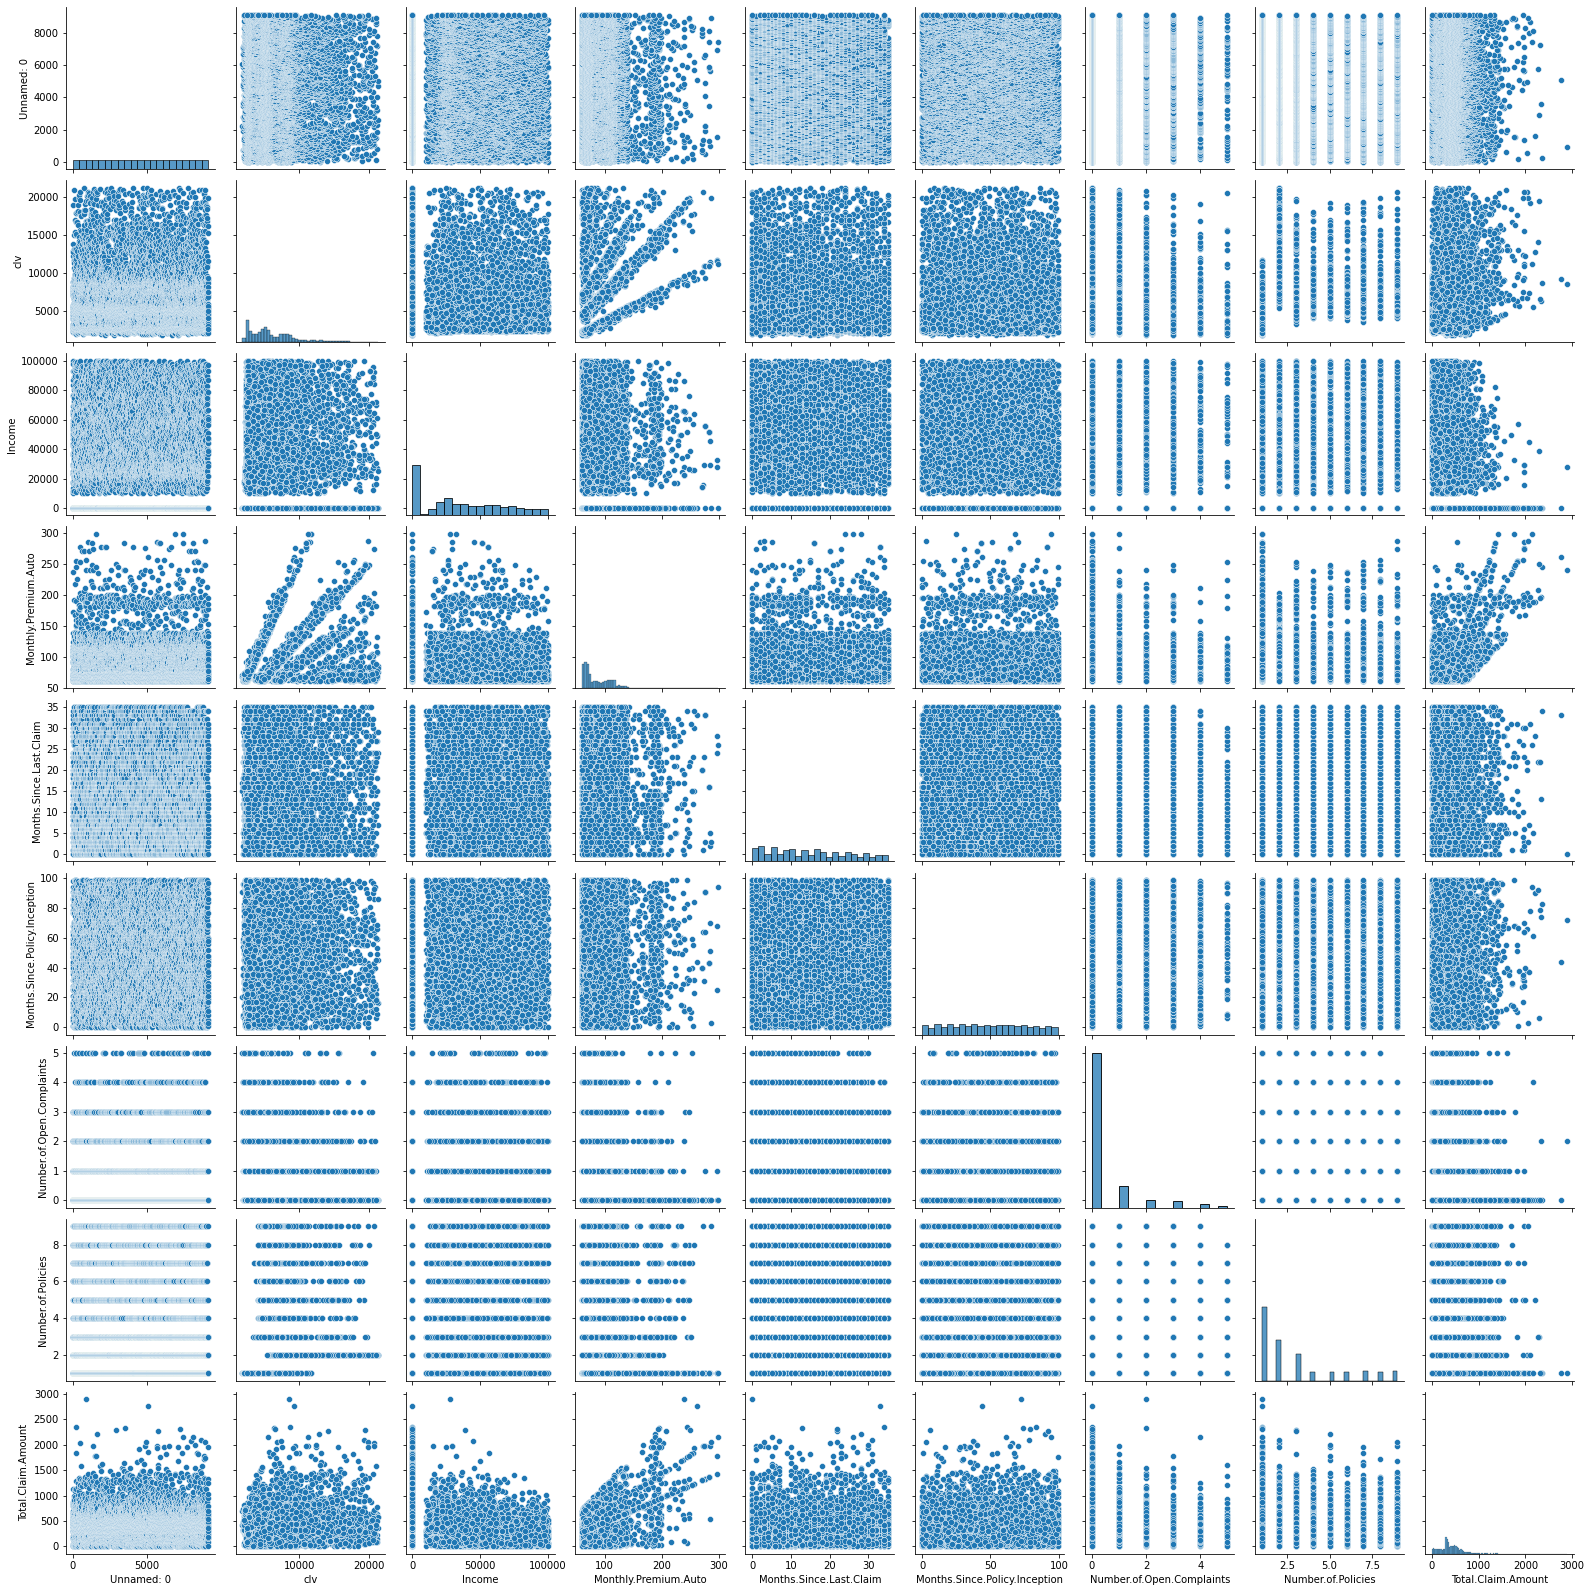

In [ ]:
sns.pairplot(orig_data)

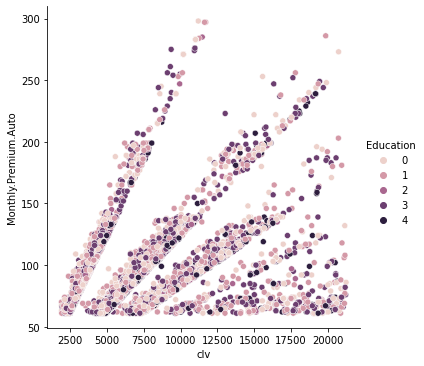

In [ ]:
 sns.relplot(x = 'clv', y = 'Monthly.Premium.Auto', hue='Education', data =client)

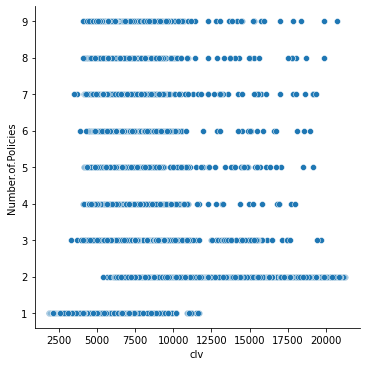

In [ ]:
 sns.relplot(x = 'clv', y = 'Number.of.Policies', data = client)

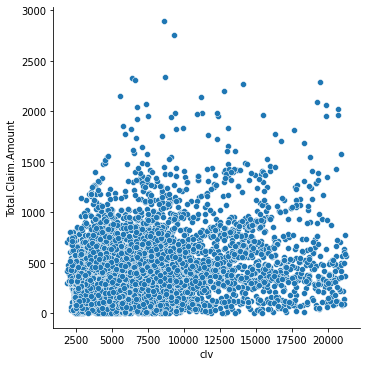

In [ ]:
 sns.relplot(x = 'clv', y = 'Total.Claim.Amount', data = client)

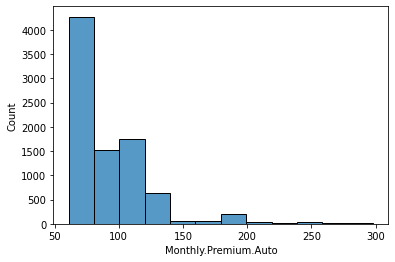

In [ ]:
sns.histplot(client['clv'], bins = 12)

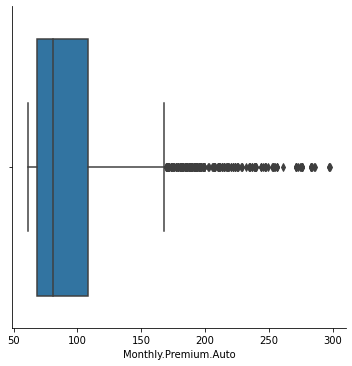

In [ ]:
sns.catplot(x='clv', kind = 'box', data=client)

As seen above, we can observe that most variables have a non-linear relation with regards to the clv, our label. However, it is important to note that clv has a high correlation coefficient with Monthly.Premium.Auto, Number.Of.Policies as well as Total.Claim.Amount. In fact, it shows a rather linear relationship with the Monthly Premium, hence we might be able to learn a model that uses Linear Regression. Otherwise, we can resort to other ML technqiues. We will explore the following EDA techniques:

<h2> Test 1: Predictive Analysis using Linear Regression </h2>

We will begin by using the simple linear regression Numpy package in order to obtain the result. As seen above, most of the features are largely non-linear, so we should not expect a very accurate result

In [ ]:
# installing dependencies
import numpy as np
import sklearn

In [ ]:
t1_data = data

In [ ]:
t1_data.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,2,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,3,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,4,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,5,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
train = t1_data.drop(['clv'], axis =1)
test = t1_data['clv']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3,random_state = 2)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = regr.predict(X_test)

In [ ]:
pred

array([5001.48077482, 6369.33917105, 6412.66626992, ..., 4873.14673428,
       5503.62257544, 4077.81028097])

In [ ]:
regr.score(X_test,y_test)

0.23368815706999826

Hence, the above prediction gave us an accuracy score of around 0.2337, hence, the model is only 23.37% accurate in determining the Consumer Lifetime Value. This may give us a ballpark estimation, howeve it is not accurate enough for rea-life use. We will now try using Machine Learning in order to learn a model.

<h2> Test 2: Machine Learning using Linear Regression/ Gradient Descent </h2>

We now use the same linear regression algorithm as Test 1, but this time we will use iterative loss reduction using gradient descent.

In [ ]:
# Installing dependencies
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [ ]:
# Import the dataset.
t2_data = data

# Scale the label.
t2_data["clv"] /= 1000.0

# Print the first rows of the pandas DataFrame.
t2_data.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2.8,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.8,5,1
1,2,7.0,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.5,0,1
2,3,12.9,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.5,5,1
3,4,7.6,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.9,3,1
4,5,2.8,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.1,0,1


In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = t2_data.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
288/288 [==============================] - 1s 1ms/step - loss: 2149.7776 - root_mean_squared_error: 46.3657
Epoch 2/30
288/288 [==============================] - 0s 1ms/step - loss: 13.3377 - root_mean_squared_error: 3.6521
Epoch 3/30
288/288 [==============================] - 0s 1ms/step - loss: 13.2539 - root_mean_squared_error: 3.6406
Epoch 4/30
288/288 [==============================] - 0s 1ms/step - loss: 13.3212 - root_mean_squared_error: 3.6498
Epoch 5/30
288/288 [==============================] - 0s 1ms/step - loss: 13.2874 - root_mean_squared_error: 3.6452
Epoch 6/30
288/288 [==============================] - 0s 1ms/step - loss: 13.3342 - root_mean_squared_error: 3.6516
Epoch 7/30
288/288 [==============================] - 0s 1ms/step - loss: 13.3225 - root_mean_squared_error: 3.6500
Epoch 8/30
288/288 [==============================] - 0s 1ms/step - loss: 13.3106 - root_mean_squared_error: 3.6484
Epoch 9/30
288/288 [==============================] - 0s 1ms/step - l

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


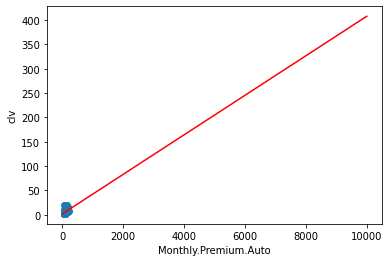

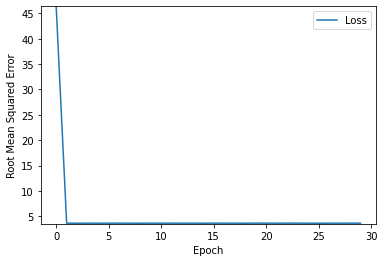

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "Monthly.Premium.Auto"  # the total number of rooms on a specific city block.
my_label="clv" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, t2_data, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = t2_data[feature][100:100 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (t2_data[feature][100 + i],
                                   t2_data[label][100 + i],
                                   predicted_values[i][00] ))

In [ ]:
predict_house_values(25, my_feature, my_label)

feature   label          predicted
  value   value          value
--------------------------------------
  117      9               7
   74      6               5
   62      2               5
   85      7               6
   98      8               6
  109      8               7
   66      8               5
  102      7               6
  133      5               8
   86      7               6
   62      2               5
   78      3               5
   83      3               6
  112      9               7
   68      5               5
  192     15              10
   63      3               5
   78      3               5
   97      4               6
   66     12               5
   69      8               5
  109      4               7
   74      6               5
   72      6               5
  118      5               7
